# Multiple Linear Regression part-2

# Dataset - 50_Startups

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [7]:
startups1 = pd.read_csv('50_Startups.csv')
startups1.head(3)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39


In [8]:
startups1.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [27]:
# don't want to categorical value, So remove "State", columns
startups2 = startups1.drop(['State'],axis=1)

In [11]:
startups2.head(1)

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.2,136897.8,471784.1,192261.83


# Rename the columns

In [16]:
startups3 = startups2.rename({'R&D Spend' : 'RDSpend','Marketing Spend' : 'MSpend','Administration' : 'AD'},axis = 1)
startups3.head(3)

,RDSpend,AD,MSpend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39


# Null Value and data type check

In [18]:
startups3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RDSpend  50 non-null     float64
 1   AD       50 non-null     float64
 2   MSpend   50 non-null     float64
 3   Profit   50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [20]:
startups3.isna().sum()

RDSpend    0
AD         0
MSpend     0
Profit     0
dtype: int64

# Duplicate value check and drop


In [23]:
startups3[startups3.duplicated()]

,RDSpend,AD,MSpend,Profit


# Correlation Matrix

In [25]:
startups3.corr()

,RDSpend,AD,MSpend,Profit
RDSpend,1.000000,0.241955,0.724248,0.972900
AD,0.241955,1.000000,-0.032154,0.200717
MSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Scatterplot between variables along with histograms

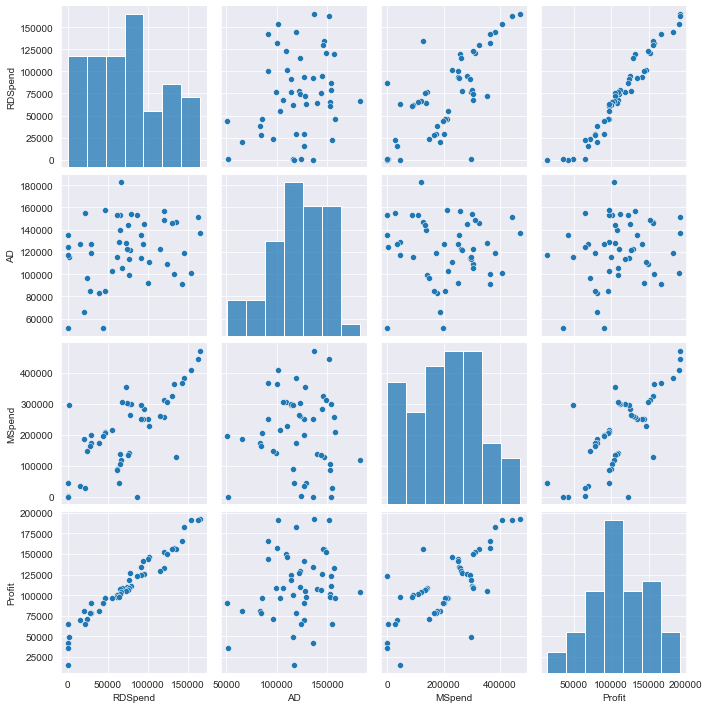

In [26]:
sns.set_style(style='darkgrid')
sns.pairplot(startups3)

# Try to fit a model for better price

# Predict a model for better price without using any transformation

In [29]:
startups3.head(1)

,RDSpend,AD,MSpend,Profit
0,165349.2,136897.8,471784.1,192261.83


In [30]:
model1 = smf.ols('Profit~RDSpend+AD+MSpend',data = startups3).fit()

In [31]:
model1.params

Intercept    50122.192990
RDSpend          0.805715
AD              -0.026816
MSpend           0.027228
dtype: float64

In [32]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           4.53e-30
Time:                        10:01:37   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RDSpend        0.8057      0.045     17.846      0.000       0.715       0.897
AD            -0.0268      0.051     -0.526      0.602      -0.130       0.076
MSpend         0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### From the above results we found thet R-Squared value is 0.951.  But here P-Value of Administration and Marketing spend are greter than 0.05, hence it is insignificant.

# Residual Analysis

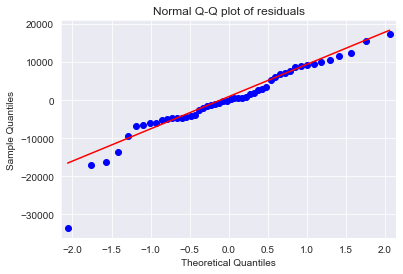

In [35]:
# Test Normality of Residuals (Q-Q plot)
import statsmodels.api as sm
qqplot = sm.qqplot(model1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [48]:
list(np.where(model1.resid<-20000))

[array([49], dtype=int64)]

# Residual plot for Homoscedasticity

In [49]:
def get_standardized_values(vals):
    return (vals - vals.mean())/vals.std()

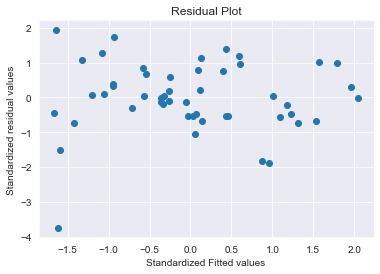

In [50]:
plt.scatter(get_standardized_values(model1.fittedvalues),
           get_standardized_values(model1.resid))
plt.title("Residual Plot")
plt.xlabel("Standardized Fitted values")
plt.ylabel("Standardized residual values")
plt.show()

In [66]:
startups4 = startups3.drop(startups3.index[[49]],axis=0).reset_index()

In [67]:
startups4.shape

(49, 5)

In [68]:
startups5 = startups4.drop(['index'],axis=1)

In [69]:
startups5.shape

(49, 4)

# Model 2

In [70]:
model2 = smf.ols('Profit~RDSpend+AD+MSpend',data = startups5).fit()

In [71]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           8.85e-32
Time:                        10:57:33   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDSpend        0.7830      0.038     20.470      0.000       0.706       0.860
AD            -0.0222      0.043     -0.518      0.607      -0.109       0.064
MSpend         0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Detecting Influencers/Outliers

# Cook's Distance

In [58]:
model1_influence = model1.get_influence()
(c, _ ) = model1_influence.cooks_distance

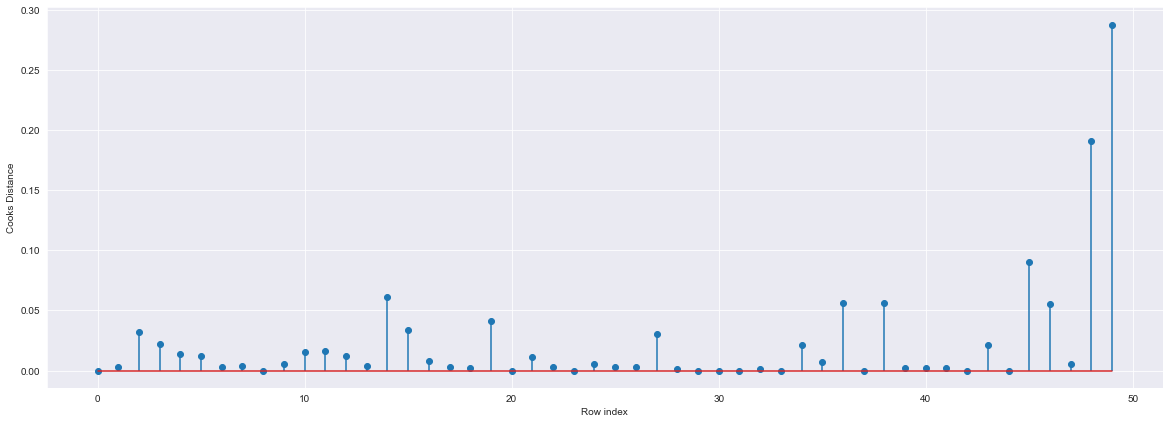

In [63]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startups3)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [72]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

### We will do the leverage influence plot for detection of outlier in our dataset

# High influence point

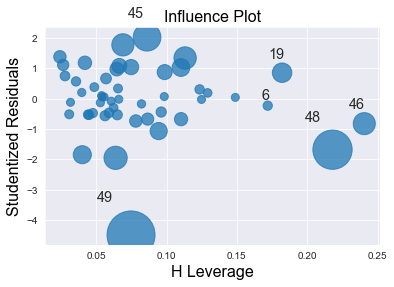

In [73]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model1)
plt.show()

In [76]:
k = startups5.shape[1]
n = startups5.shape[0]
leverage_cutoff = 3*((k +1)/n)
leverage_cutoff

0.30612244897959184

In [79]:
# remove the 49 from our dataset
startups3[startups3.index.isin([49])]

,RDSpend,AD,MSpend,Profit
49,0.0,116983.8,45173.06,14681.4


In [80]:
startups4 = startups3.drop(startups3.index[[49]],axis=0).reset_index()

In [82]:
startups5= startups4.drop(['index'],axis=1)

In [85]:
startups5.tail()

,RDSpend,AD,MSpend,Profit
44,22177.74,154806.14,28334.72,65200.33
45,1000.23,124153.04,1903.93,64926.08
46,1315.46,115816.21,297114.46,49490.75
47,0.00,135426.92,0.00,42559.73
48,542.05,51743.15,0.00,35673.41


# Model 3

In [90]:
# Predict a new model after removing influencers
model3 = smf.ols('Profit~RDSpend+AD+MSpend', data = startups5).fit()

In [91]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           8.85e-32
Time:                        11:11:48   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RDSpend        0.7830      0.038     20.470      0.000       0.706       0.860
AD            -0.0222      0.043     -0.518      0.607      -0.109       0.064
MSpend         0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# model 4

In [95]:
# lets predict a model excluding administration and market spend variables
model4 = smf.ols('Profit~RDSpend',data = startups5).fit()

In [96]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     1055.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           7.56e-34
Time:                        11:15:45   Log-Likelihood:                -508.68
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      47   BIC:                             1025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.172e+04   2229.914     23.195      0.000    4.72e+04    5.62e+04
RDSpend        0.8278      0.025     32.477      0.000       0.777       0.879
==============================================================================
Omnibus:                        0.070   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.966   Jarque-Bera (JB):                0.203
Skew:                          -0.080   Prob(JB):                        0.903
Kurtosis:                       2.728   Cond. No.                     1.71e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion
##          Comaring between all models, model3 has higher R-squred valu.

# Hence model3 is better to predict the profit

In [97]:
pred = model3.predict(startups5.iloc[:,:3])

In [98]:
actual = startups5.Profit

In [100]:
# pip install ml_metrics

Note: you may need to restart the kernel to use updated packages.


In [101]:
from ml_metrics import rmse

In [102]:
rmse(pred,actual)

7430.589093678349

# Table of R-squred value for all model

In [104]:
data = {'Model': ['Model1','Model2','Model3','model4'],'R_Squred Value':[0.951,0.959,0.961,0.957]}

In [105]:
R_Squre_Tabel = pd.DataFrame(data)
R_Squre_Tabel

,Model,R_Squred Value
0,Model1,0.951
1,Model2,0.959
2,Model3,0.961
3,model4,0.957
